## Homework One

### Question 1
Fibonacci sequence (Fn), is defined as a sequence of numbers such that each
number is the sum of two preceding ones starting from 0 and 1 (F0 = 0 and
F1 = 1). Hence, we have the following value at nth position
Fn = Fn−1 + Fn−2
Write a python function that takes the number of elements the user wants in
the generated Fibonacci sequence as a parameter. The function should return
the generated Fibonacci sequence when called. Hence,
• For user input n = 0, function should return [ ]
• For user input n = 1, function should return [0]
• For user input n = 2, function should return [0, 1]
• For user input n = 3, function should return [0, 1, 1] .. and so on

In [1]:
5
8
import numpy as np
import matplotlib.pyplot as plt



#Reference cited: https://realpython.com/fibonacci-sequence-python/

In [2]:
# My answer. My reference is above.
x = int(input())
cache = {0: 0, 1: 1}
def Fn(n):
    if n in cache:
        return cache[n]
    cache[n] = Fn(n-1) + Fn(n-2)
    return cache[n]
[Fn(n) for n in range(x)]

8


[0, 1, 1, 2, 3, 5, 8, 13]

### Question 2: (15 points)
Write a function in python that takes a list of numbers from the user and returns
a different list which only contains those numbers from the original list that are
within the range [μ − σ, μ + σ]. Here μ and σ are the mean and standard
deviation of numbers in the original list

In [3]:
#Answer
import numpy as np
a = int(input());s = int(input());d = int(input());f = int(input());j = int(input());k = int(input());l = int(input())
x = np.array([a,s,d,f,j,k,l])
u = np.mean(x); o = np.std(x)

z= u-o
i= u+o
y = x[(x>=z) & (x<=i)]
y

8
4
6
7
9
7
6


array([8, 6, 7, 7, 6])

## Question 3: (25 points)
Write a python function that takes an integer (n) as an input and:
1. (5 points) If the integer is less than 1, the function should print an error
message and return nothing.
2. for other cases:
1
(a) (10 points) Returns a numpy array with a checkerboard pattern.
For example if user provides n = 5 to the function, then it should
return the 5x5 array 

0 1 0 1 0
1 0 1 0 1
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0

(b) (10 points) Plots the checkboard pattern as an image with grayscale
colormap.


In [4]:
#reference https://stackoverflow.com/questions/2169478/how-to-make-a-checkerboard-in-numpy
#Answer
import numpy as np
n = 5
if n <= 1:
    print(error)
a = np.ones(n*n, dtype=int)
a[::2]=0
a = a.reshape(n, n)
a

np.save("Checkerboard", a)
np.load("Checkerboard.npy")

array([[0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0]])

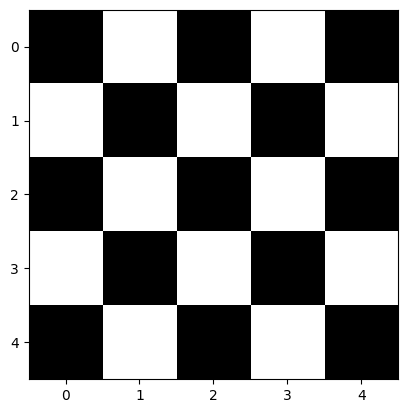

In [5]:
np.load("Checkerboard.npy")
import matplotlib.pyplot as plt

plt.imshow(a,cmap="gray")
#Grayscale

## Question 4 : (45 points)
We want to understand the application of Central limit theorem to the dice
throw experiment for a biased dice. For this:
1. (5 points) Generate a population of 1 million dice throws with each face
probability as follows
Face 1 2 3 4 5 6
Probability 1/3 1/12 1/12 1/6 1/6 1/6
2. (5 points) Assuming a sample size of n = 10000, draw m = 10000 samples
from the population with replacement.
3. (15 points) Generate the histogram for 10000 realizations of the random
variable
Zm = √n · Sm − μ
σ
where Sm is the average of all the dice faces included in a sample, μ and σ
are the mean and standard deviation of the population for the dice throw
experiment. Additionally, overlay a pdf of a standard gaussian distribution
(μ = 0, σ = 1) on the plotted histogram.
4. (15 points) Fixing the sample size as 10000, consider 4 different cases of
different number of samples: [100 5000, 10000, 20000]. For each of these
4 cases, make a similar histogram as you made in part 3 and plot these
histograms in 2x2 matplotlib subplot grid.
5. (5 points) Explain in your own words what you observe in the plots in
part 4 above.
2


In [6]:
import numpy as np
from matplotlib.pyplot import *
from scipy import stats


In [7]:
dice = list(range(1,7))
population = 1000000
S_n = 10000; m = 10000
mu = float(1*1/3 + 2*1/12 + 3*1/12 + 4*1/6 + 5*1/6 + 6*1/6)

Var= ((1**2)*(1/3) + (2**2)*1/12 + (3**2)*1/12 + (4**2)*1/6 + (5**2)*1/6 + (6**2)*1/6) - mu**2

samples = [np.random.choice((dice),p=(1/3,1/12,1/12,1/6,1/6,1/6),size=S_n) for i in range(m)]
rlz = []
for i in samples:
    Zm = np.sqrt(S_n)*((sum(i)/S_n - mu)/np.sqrt(Var))
    rlz.append(Zm)


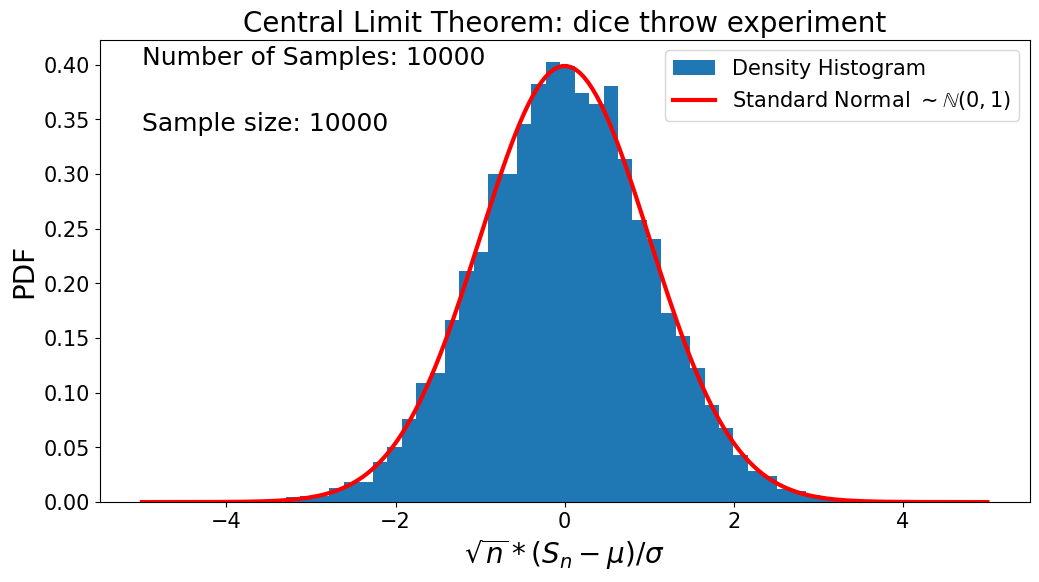

In [8]:
figure(figsize=(12,6))
ax = subplot2grid((1,1),(0,0))
plt.hist(rlz, density = True, bins = 50, label = 'Density Histogram')
ax.set_xlabel('$\sqrt{n}*(S_n - \mu)/\sigma$',size = 20)
ax.set_ylabel('PDF',size = 20)
ax.set_title('Central Limit Theorem: dice throw experiment',size = 20)
yticks(size=15)
xticks(size=15)

x = np.linspace(-5,5,200)
plot(x, stats.norm.pdf(x, 0, 1), color = 'r',lw = 3, label = 'Standard Normal $\sim \mathbb{N}(0,1)$')
ax.legend(loc=1, prop={'size': 15})
text(-5,0.40,'Number of Samples: '+str(m), fontsize=18)
text(-5,0.34,'Sample size: '+str(S_n), fontsize=18)
plt.show()

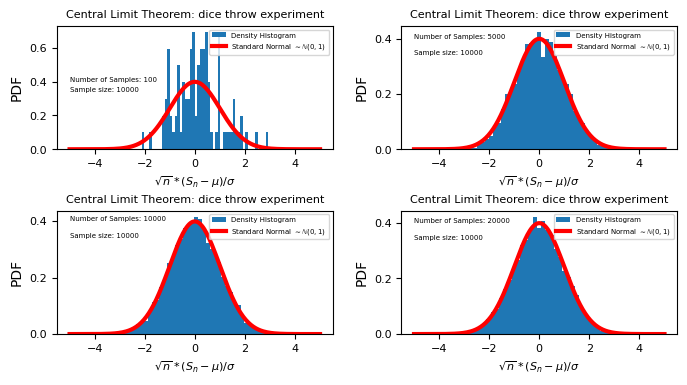

In [9]:
fig = figure(figsize=(8,4))
m2 = [100, 5000, 10000, 20000]
counter = 1
for j in m2:
    samples = [np.random.choice((dice),p=(1/3,1/12,1/12,1/6,1/6,1/6),size=S_n) for k in range(j)]
    rlz = []
    for i in samples:
        Zm = np.sqrt(S_n)*((sum(i)/S_n - mu)/np.sqrt(Var))
        rlz.append(Zm)
    ax = fig.add_subplot(2,2,counter)
    plt.hist(rlz, density = True, bins = 50, label = 'Density Histogram')
    ax.set_xlabel('$\sqrt{n}*(S_n - \mu)/\sigma$',size = 8)
    ax.set_ylabel('PDF',size = 10)
    ax.set_title('Central Limit Theorem: dice throw experiment',size = 8)
    yticks(size=8)
    xticks(size=8)

    x = np.linspace(-5,5,200)
    plot(x, stats.norm.pdf(x, 0, 1), color = 'r',lw = 3, label = 'Standard Normal $\sim \mathbb{N}(0,1)$')
    ax.legend(loc=1, prop={'size': 5})
    text(-5,0.40,'Number of Samples: '+str(j), fontsize=5)
    text(-5,0.34,'Sample size: '+str(S_n), fontsize=5)
    counter += 1
plt.subplots_adjust(wspace = .25, hspace = .50 )
plt.show()




In [10]:
# Part 5: In the graphs above you can see a difference between the accuracy of the experiment. The accuracy of the model increases as the
# number of samples increases. Also, the different elements being given different probabilities doesn't matter as the sample size is increased
# due to the central limit theorem. Specifically, we can see using a standardized sample mean that even if the probabilites are biased as the
# number of samples is increased, the model will show a standard normal distribution.